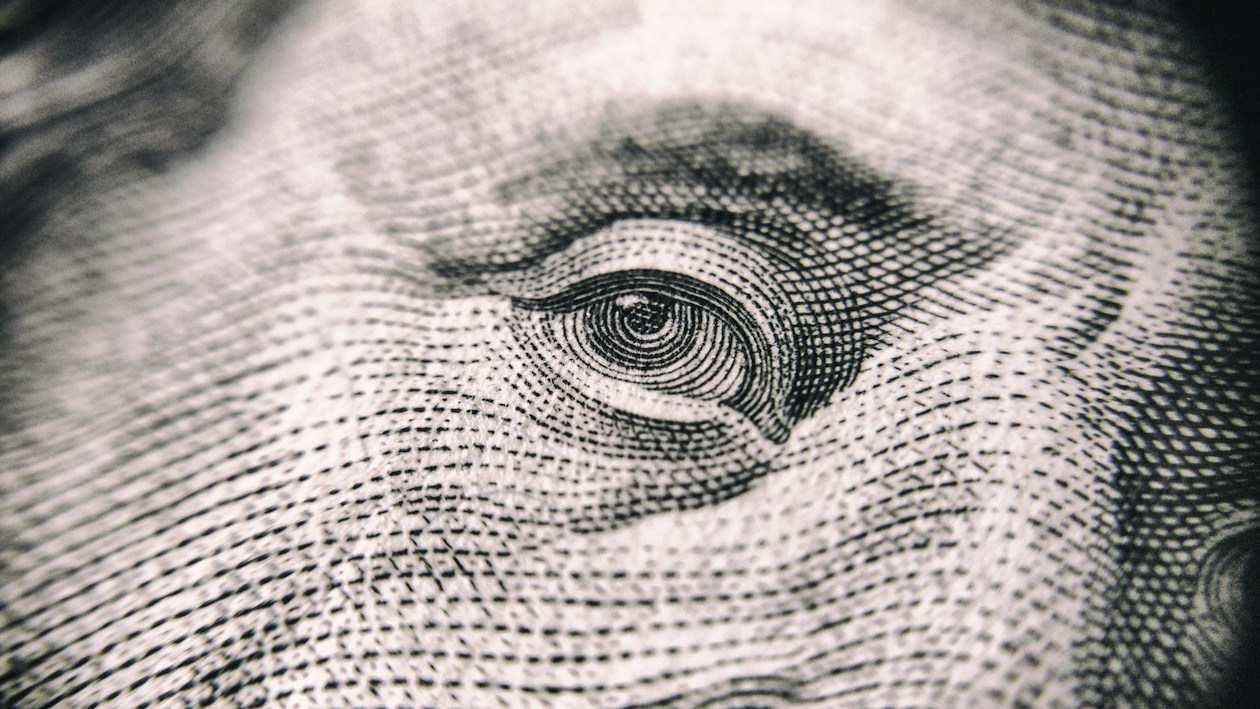

## Disclaimer

-----------------------------------------------------------------------------------------
**This data science notebook is provided for educational purposes only.**

It contains code, analysis, and models that are intended to serve as learning materials and examples. The content is not intended for direct deployment to production environments.

You are encouraged to adapt and modify the contents of this notebook in accordance with the license provided in the associated github repository. However, it is essential to exercise caution, further development, and thorough testing before considering any deployment to production systems.

The authors and contributors of this notebook assume no liability for any consequences, including financial or operational, resulting from the use or misuse of the information and code provided herein. Always consult with appropriate experts and conduct rigorous testing and validation before applying any techniques or models in a real-world, production context.

**By using this notebook, you agree to these terms and conditions.**

-----------------------------------------------------------------------------------------


# Background

## Money laundering 101

A 2023 report entitled [Catch Me If You Can: Semi-supervised Graph
Learning for Spotting Money Laundering](https://arxiv.org/pdf/2302.11880.pdf) lays out the context:

> Money laundering is an alarming problem globally. It causes
approximately 1.6 Trillion USD corresponding to 2.7% of
the global GDP is laundered every year. Criminals
involved in money laundering activities, often hide the orig-
inal sources of illegal money by using the funds in casinos or
real estate purchases, or by overvaluing legitimate invoices.

> Anti-money laundering (AML) is the task of preventing
criminals from moving illicit funds through the financial
system. AML is often perceived through regulatory com-
pliance since the burden of forensic analysis falls primar-
ily on financial institutions.

An article entitled "Network analytics and the fight against money laundering" within the report [Transforming approaches to AML and financial crime](https://www.mckinsey.com/~/media/McKinsey/Business%20Functions/Risk/Our%20Insights/Transforming%20approaches%20to%20AML%20and%20financial%20crime/Transforming-approaches-to-AML-and-financial%20crime-vF.pdf) expands on what this looks like and how it should evolve:

>Traditional AML performed by a bank uses a customer’s profile and transaction history to generate risk ratings and flag various suspicious behavior, such as cash deposits over $10,000. This rules-based approach is critical, but it doesn’t account for funds laundered through networks of individuals in smaller, non-rounded dollar amounts to avoid detection.

>To take full advantage, most institutions will need to build capabilities in network science as the tools may be unfamiliar to even experienced data scientists. This will unlock a significant opportunity to improve both customer risk rating and transaction monitoring."

[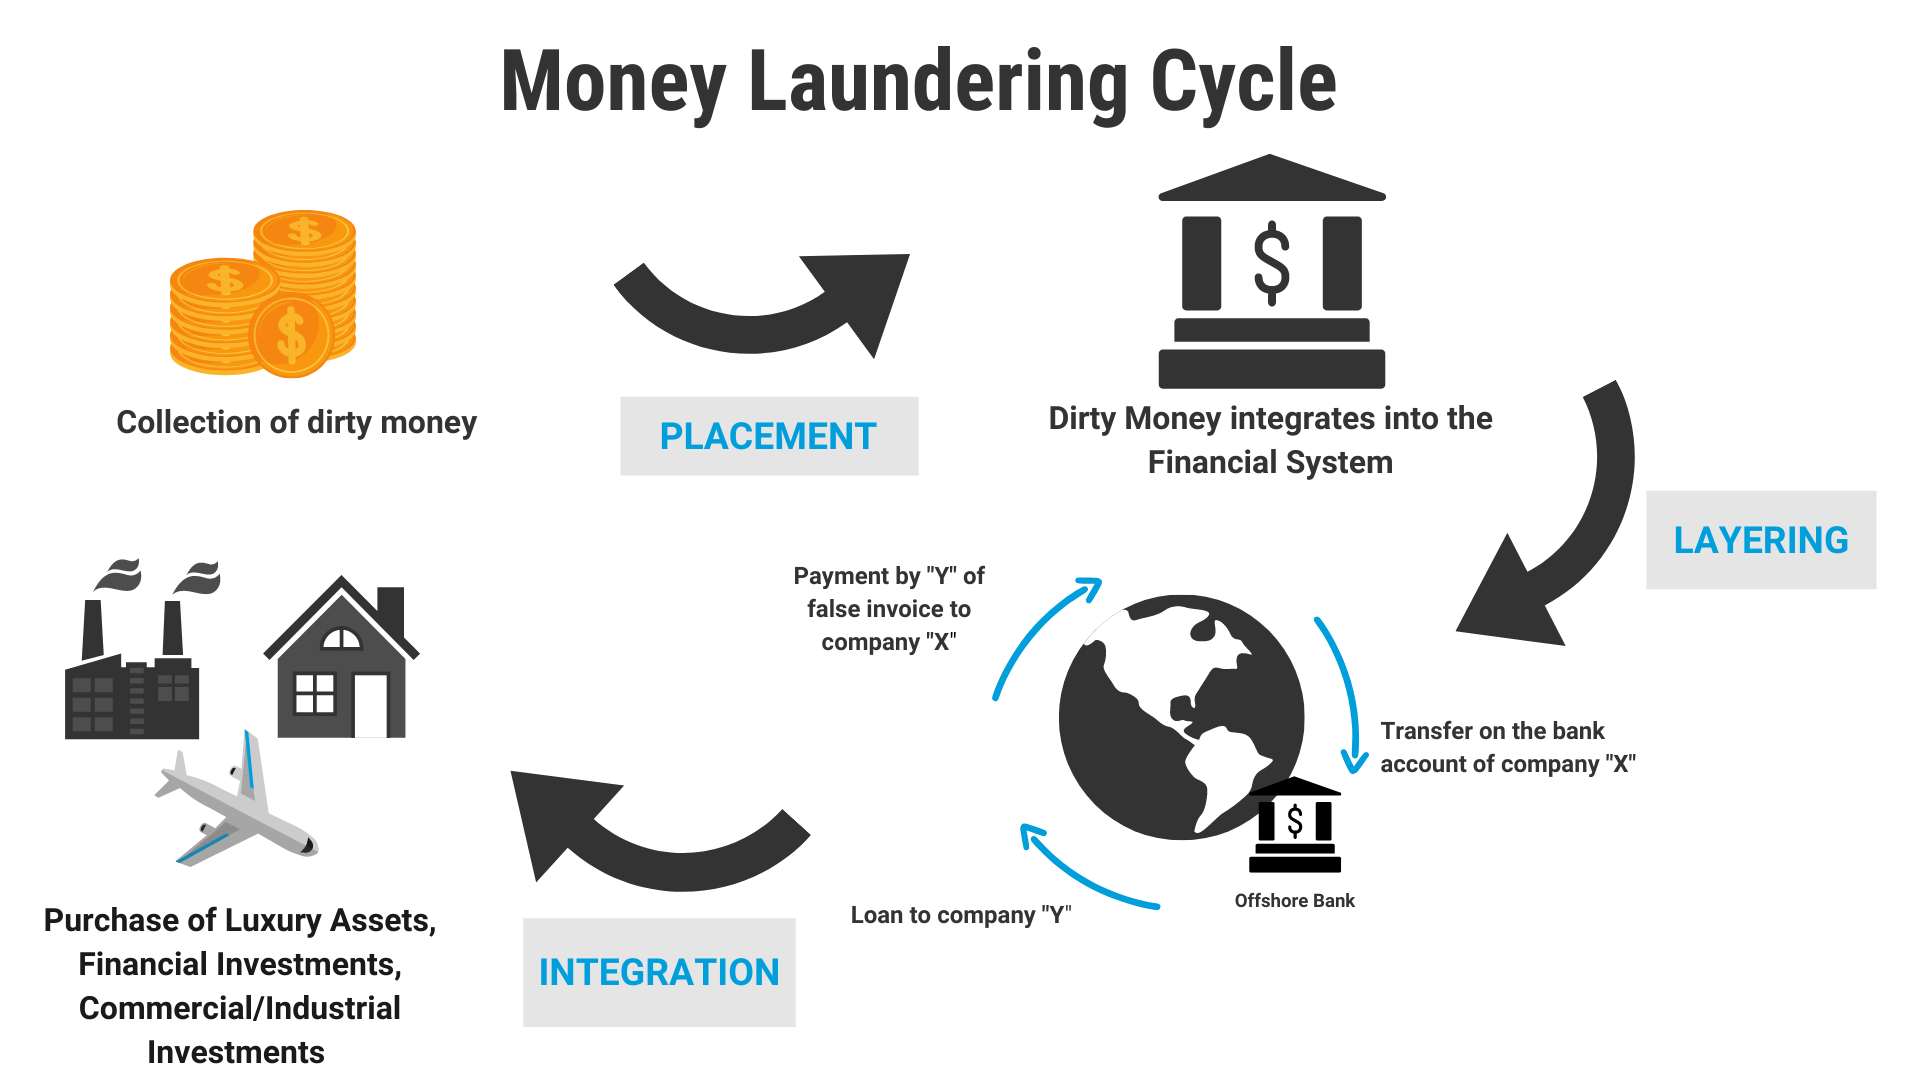](https://www.unodc.org/unodc/en/money-laundering/overview.html)

### Brief history of AML

Evolution of rules-based policies:
*	1990 [The forty recommendations of the FATF on money laundering](https://www.fatf-gafi.org/content/dam/fatf-gafi/recommendations/FATF%20Recommendations%201990.pdf)
*	2001 [IX special recommendations on terrorist financing](https://www.fatf-gafi.org/en/publications/Fatfrecommendations/Ixspecialrecommendations.html)
*	2012 The [FATF recommendations](https://www.fatf-gafi.org/content/dam/fatf-gafi/recommendations/FATF%20Recommendations%202012.pdf.coredownload.inline.pdf) combining these into a unified framework of “40+9” AML/CFT recommendatinos (updated in 2023)
* 2018: [Joint statement to innovate on AML/CFT](https://www.federalreserve.gov/newsevents/pressreleases/files/bcreg20181203a1.pdf)

Corresponding evolution of tech-based implementations (clearly a non-exhaustive list of selected publications):
* 2005: [Developing an intelligent data discriminating system of AML based on SVM](https://storage.googleapis.com/suptech-lab-practical-data-science-public/tang%20and%20yin%202005.pdf)
* 2018: [Machine Learning techniques for AML](https://storage.googleapis.com/suptech-lab-practical-data-science-public/Machine_learning_techniques_for_anti-money_launder.pdf)
* 2019: [AML Research: A system for identification and multi-classification](https://storage.googleapis.com/suptech-lab-practical-data-science-public/feng%20et%20al%202019.pdf)
* 2019: [SupTech for AML](https://www.bis.org/fsi/publ/insights18.pdf)
* 2020: [AI for AML: A Review & Extension](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3625415)
* 2023: [A dynamic GCN for AML](https://storage.googleapis.com/suptech-lab-practical-data-science-public/wei-et-al-2023.pdf)
* 2023: [Catch Me If You Can: Semi-supervised Graph Learning for Spotting Money Laundering](https://arxiv.org/pdf/2302.11880.pdf)
* 2023: [Nordic-Baltic Regional Report on AML-CFT Supervision using machine learning (Annex I)](https://www.imf.org/en/Publications/CR/Issues/2023/09/01/Nordic-Baltic-Regional-Report-Technical-Assistance-Report-Nordic-Baltic-Technical-538762)

## Acknowledgements

Experts
* Mark Weber's consistently groundbreaking research on [AI in AML](https://www.markrweber.com/graph-deep-learning)
* Maxime Labonne's [GNN course](https://github.com/mlabonne/graph-neural-network-course)
* Phillip Lippe's [deep learning tutorials](https://github.com/phlippe/uvadlc_notebooks), including GNNs

Datasets
* [IBM Research synthetic transactions for AML set](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml)
* [IBM Research AMLSim synthetic data tool](https://github.com/IBM/AMLSim)
* [Real anonymized transactions from Czech bank](https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)
* [Elliptic dataset, real crypto data](https://www.kaggle.com/datasets/ellipticco/elliptic-data-set)

Open source data science
* [AML with real, anonymized transactions (semisupervised ML)](https://github.com/Michaels72/AML_Real_Anonymized_Transactions/blob/master/AML_Transaction.ipynb)
* [AML with outlier detection (unsupervised ML)](https://github.com/datarobot-community/tutorials-for-data-scientists/blob/master/Anomaly%20Detection%20(Unsupervised%20Learning)/Python/Anti%20Money%20Laundering%20with%20Outlier%20Detection/src/Anti%20Money%20Laundering%20with%20Outlier%20Detection.ipynb)
* [AML network analysis](https://github.com/jasonclwu/202209_AML_Network_Analysis/blob/main/AML_Network_Analysis.ipynb)

## Defining our target

AML primarily consists of five activities:
1. Internal compliance and organization
2. Know Your Customer (KYC)
3. **Transaction monitoring systems (TMS)**
4. **Analysis of flagged accounts**
5. Suspicious transaction reports (SARs)

In terms of data science for supervisors, items 3 & 4 in this list are the richest for exploration. The TMSs of step 3 are typically rule-based flagging systems, while the deeper analysis of step 4 typically follows directly from such flagging.

As such, we will cover examples of the following key concepts in this notebook as they relate to steps 3 and 4:
  * Finding data & dealing with large datasets
  * Feature engineering on real, untagged datasets
    * Feature engineering
    * Supervised ML
  * Analysis on simulated, tagged datasets
    * Rules-based models
    * Network analysis
    * Graph Neural Networks (GNNs)
  * Further reading (e.g., PETs for federated learning)

## Installing and importing libraries

In [1]:
!pip install -qq pyvis

In [2]:
# Clear unnecessary warnings from our outputs (remove this cell if modifying code!)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
##########################################
# General helper functions and libraries #
##########################################

# General libraries
from assets.getting_started import connect_to_database
import os
import psycopg2
import pandas as pd
import numpy as np
from decimal import Decimal
import dask.dataframe as dd
from IPython.core.display import display, HTML
import random
from functools import reduce
from sklearn.preprocessing import StandardScaler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

####################
# Modeling process #
####################

# ML helpers
from sklearn.model_selection import train_test_split

# Network libraries
import networkx as nx
from pyvis import network as net

# Data considerations in AML

Before we dive in, it's important to recognize two things about the data

1. The data is scarce
2. The data is massive

## Scarcity of transactional data for AML

[Han et al](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3625415) pointed out:

> It is important for systems to be trained using real-world data, instead of simulated data. At present, there are no open-source data for money laundering research, due to the importance of maintaining client privacy

Compounding this issue, as [Weber et al](https://arxiv.org/pdf/1812.00076.pdf) pointed out, even within proprietary systems:

> Data sets are often fragmented, inaccurate, incomplete, and/or inconsistent, within as well as across organizations

Given this extreme scarcity of real, tagged data, we'll be exploring the two alternatives we do have in the remainder of this notebook:

* Real (but untagged) data from 1999 Czech banks
* Synthetic (but tagged) data from IBM's AMLSim

The remainder of the notebook consists of practical examples of what we can do with each of these types of data.

Of course, the intention is that these public resources and examples included and linked to from this notebook can be forked and adapted into proprietary environments wherein supervisors do have access to real, transactional, tagged data.

## Big Data and mechanisms for experimentation

Before we dive into those examples, however, it's important to recognize that the data we're talking about is typically massive, yet the transactions need to be classified in as close to real-time as possible to mitigate risk (e.g., of holding up valid transactions and/or allowing fraudulent transactions to propogate further into the network).

As such, it's important to be aware of tools for more efficiently dealing with this Big Data, for example reading in parts at at time and/or calculating aggregates rather than reading the whole dataset. To this end:

* Pandas documentation includes tips on [scaling to large datasets](https://pandas.pydata.org/pandas-docs/stable/user_guide/scale.html), however these only work for local files.

* Alternative dataframe libraries [Dask](https://docs.dask.org/en/stable/) and [modin](https://modin.readthedocs.io/en/latest/) are alternatives that work well for both local files and remote ones (i.e., accessed via a URL).

We will continue to use pandas within the remainder of this notebook for pedagogical reasons, as we'll be usin smaller  illustrative datasets within the course.

But in this small section here we will briefly present dask and note these libraries and techniques are useful to know for real-world applications beyond these notebooks.

For illustration's sake, let's talk a look at a large one (17GB) and see some examples of how it can be handled.

In [4]:
c = connect_to_database()
q = """
  SELECT *
  FROM datagymnasium."hi_large_trans"
  LIMIT 5000
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
data = c.fetchall()
array_data = np.array(data)
df = dd.from_array(array_data, columns=cols).compute()
print(df.columns)
df

Index(['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1',
       'Amount Received', 'Receiving Currency', 'Amount Paid',
       'Payment Currency', 'Payment Format', 'Is Laundering'],
      dtype='object')


Timestamp From Bank    Account To Bank  Account.1  \
0     2022/08/01 00:04      2310  802075BA0   65813  8491D42D0   
1     2022/08/01 00:15     15240  800ACF570   65813  8491D42D0   
2     2022/08/01 00:03      4744  8020888C0    4744  8020888C0   
3     2022/08/01 00:02        20  802089C70      20  802089C70   
4     2022/08/01 00:05      5610  80208AC00    5610  80208AC00   
...                ...       ...        ...     ...        ...   
4995  2022/08/01 00:03     26134  8028F61A0    2597  8029395B0   
4996  2022/08/01 00:06      3761  802939510    3761  802939510   
4997  2022/08/01 00:28     25828  802939C80   25828  802939C80   
4998  2022/08/01 00:09        20  802939C30      20  802939C30   
4999  2022/08/01 00:29     25828  802939C80   25828  802939C80   

     Amount Received Receiving Currency Amount Paid Payment Currency  \
0             150.35          US Dollar      150.35        US Dollar   
1               7.39          US Dollar        7.39        US Dollar   
2               22.4          US Dollar        22.4        US Dollar   
3              24.94          US Dollar       24.94        US Dollar   
4               5.14          US Dollar        5.14        US Dollar   
...              ...                ...         ...              ...   
4995          462.28          US Dollar      462.28        US Dollar   
4996           16.53          US Dollar       16.53        US Dollar   
4997         3229.17          US Dollar     3229.17        US Dollar   
4998            6.18          US Dollar        6.18        US Dollar   
4999             8.4          US Dollar         8.4        US Dollar   

     Payment Format Is Laundering  
0       Credit Card             0  
1       Credit Card             0  
2      Reinvestment             0  
3      Reinvestment             0  
4      Reinvestment             0  
...             ...           ...  
4995    Credit Card             0  
4996   Reinvestment             0  
4997   Reinvestment             0  
4998   Reinvestment             0  
4999   Reinvestment             0  

[5000 rows x 11 columns]

In [5]:
# This cell takes about 14 minutes to run

c = connect_to_database()
q = """
  SELECT "Receiving Currency",
  SUM("Amount Received") AS "Amount Received",
  SUM("Amount Paid") AS "Amount Paid",
  COUNT("Amount Paid") AS "Count"
  FROM (SELECT * FROM datagymnasium."hi_large_trans" ORDER BY RANDOM() LIMIT 6232620) AS t
  GROUP BY "Receiving Currency"
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
data = c.fetchall()
array_data = np.array(data)
df_out = dd.from_array(array_data, columns=cols).compute()
print("Calculations based on having read in %s rows" % df_out['Count'].sum())
df_out

Calculations based on having read in 6232620 rows


Receiving Currency    Amount Received           Amount Paid    Count
0   Australian Dollar     70175702467.58    69862384736.200865   182724
1             Bitcoin     2827377.937355        3353117.008326   136817
2         Brazil Real    182771356097.97       177540353434.80   124702
3     Canadian Dollar     98892362450.60        98674179421.42   213664
4                Euro    291239835472.52   301454020253.695353  1433234
5        Mexican Peso    855401059174.45   773797754630.043497   166521
6               Ruble  12919118594301.13      8766643642329.73   193040
7               Rupee   3750391752526.05      3174286342216.31   144785
8         Saudi Riyal     89595047042.05        88283948473.80   111581
9              Shekel    250334279316.11       246755255449.67   279643
10        Swiss Franc     33775432343.66    33824612525.710763   167987
11           UK Pound     38244922026.49    38509261995.426569   199112
12          US Dollar    568928034091.24   845184144007.240414  2262710
13                Yen  13310857658431.53  9382873356998.431011   167569
14               Yuan   1100590776110.29  1104016338632.924002   448531

# Transaction monitoring and account flagging with 1999 Czech banking data

There are very few real, anonmyized datasets available publicly. Here we read in one such dataset that has been published and [documented](https://web.archive.org/web/20161019192412/http://lisp.vse.cz/pkdd99/berka.htm), that takes the following form:

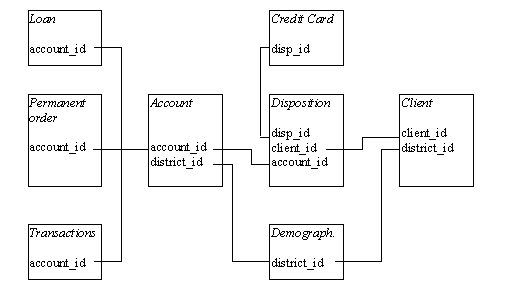

## Load the data

In [6]:
table_names = [
    'account',
    'card',
    'client',
    'disposition',
    'district',
    'loan',
    'order',
    'transaction'
]

In [7]:
c = connect_to_database()
for table in table_names:
    q = f"""
      SELECT *
      FROM datagymnasium."czech_{table}";
    """
    c.execute(q)
    cols = [desc[0] for desc in c.description]
    vars()[table] = pd.DataFrame(c.fetchall(), columns=cols)
    print(f"Shape of ** {table} ** dataframe is: {vars()[table].shape}")

Shape of ** account ** dataframe is: (4500, 4)
Shape of ** card ** dataframe is: (892, 4)
Shape of ** client ** dataframe is: (5369, 3)
Shape of ** disposition ** dataframe is: (5369, 4)
Shape of ** district ** dataframe is: (77, 16)
Shape of ** loan ** dataframe is: (682, 7)
Shape of ** order ** dataframe is: (6471, 6)
Shape of ** transaction ** dataframe is: (1056320, 10)


In [8]:
"Transaction dates range from %s to %s" % (transaction['date'].min(), transaction['date'].max())

'Transaction dates range from 930101 to 981231'

In [9]:
"Transaction amounts range from %s to %s" % (transaction['amount'].min(), transaction['amount'].max())

'Transaction amounts range from 0.0 to 87400.0'

## Preprocessing & consolidation

Like most banking systems, the data comes to us normalized into separate files, which represent the separate data tables from which they came. In order for a machine learning system to ingest this information, it's best that we prepare a single table, wherein each transaction has all related metadata attached directly to it as features.

Here we prepare the data for consolidation, then bring it together into one table via scripts inspired by and adapted from [an approach previously published this topic](https://github.com/Michaels72/AML_Real_Anonymized_Transactions/blob/master/AML_Transaction.ipynb).

First, we rename the columns for the district table (which were previously named A1, A2, etc).

In [10]:
district.columns = ["district code", "district name", "region", "no. of inhabitants",
                    "no. of municipalities with inhabitants < 499",
                    "no. of municipalities with inhabitants 500-1999",
                    "no. of municipalities with inhabitants 2000-9999",
                    "no. of municipalities with inhabitants >10000",
                    "no. of cities", "ratio of urban inhabitants" , "average salary",
                    "unemploymant rate 95", "unemploymant rate 96",
                    "no. of enterpreneurs per 1000 inhabitants", "no. of commited crimes 95",
                    "no. of commited crimes 96"]
district['district code'] = district['district code'].astype(int)

Next we begin to pull permutations of all tables together into one consolidated dataframe.

In [11]:
# Merge relevant pairs/triads of data
dfs = [
    pd.merge(account, loan, left_on='account_id', right_on='account_id', how='inner'),
    pd.merge(account, order, left_on='account_id', right_on='account_id', how='inner'),
    pd.merge(account, transaction, left_on='account_id', right_on='account_id', how='inner'),
    pd.merge(account, district, left_on='district_id', right_on='district code', how='inner'),
    pd.merge(account, disposition, left_on='account_id', right_on='account_id', how='inner'),
    pd.merge(account, pd.merge(disposition, card, left_on='disp_id', right_on='disp_id', how='inner'), left_on='account_id', right_on='account_id', how='inner'),
    pd.merge(account, pd.merge(disposition, client, left_on='client_id', right_on='client_id', how='inner'), left_on='account_id', right_on='account_id', how='inner')
]

# reduce all data to one dataframe and select relevant columns
df_czech = reduce(lambda left,right: pd.merge(left, right, on = "account_id"), dfs)
df_czech = df_czech[['account_id', 'loan_id', 'duration', 'payments', 'status', 'order_id', 'bank_to', 'account_to', 'trans_id', 'operation', 'amount', 'balance', 'bank', 'account', 'district code', 'district name', 'region', 'no. of inhabitants', 'no. of municipalities with inhabitants < 499', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999', 'no. of municipalities with inhabitants >10000', 'no. of cities', 'ratio of urban inhabitants', 'average salary', 'unemploymant rate 95', 'unemploymant rate 96', 'no. of enterpreneurs per 1000 inhabitants', 'no. of commited crimes 95', 'no. of commited crimes 96', 'card_id', 'issued', 'frequency', 'date', 'disp_id', 'client_id', 'type', 'birth_number']]
df_czech = df_czech.sort_values(by=["date"], ascending=True, ignore_index=True)

df_czech.head()

<ipython-input-11-c5fe7b35e311>:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'frequency_x', 'district_id_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_czech = reduce(lambda left,right: pd.merge(left, right, on = "account_id"), dfs)
<ipython-input-11-c5fe7b35e311>:13: FutureWarning: Passing 'suffixes' which cause duplicate columns {'frequency_x', 'district_id_x', 'date_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_czech = reduce(lambda left,right: pd.merge(left, right, on = "account_id"), dfs)


account_id loan_id duration payments status order_id bank_to account_to  \
0       5891    6202       12     5432      A    38118      EF   95617645   
1       5891    6202       12     5432      A    38118      EF   95617645   
2       5891    6202       12     5432      A    38118      EF   95617645   
3       5891    6202       12     5432      A    38118      EF   95617645   
4       5891    6202       12     5432      A    38118      EF   95617645   

  trans_id      operation  ... no. of commited crimes 95  \
0  1736607          VKLAD  ...                     18721   
1  1736730          VYBER  ...                     18721   
2  1736658  PREVOD Z UCTU  ...                     18721   
3  1736999          VKLAD  ...                     18721   
4  1736870          VYBER  ...                     18721   

  no. of commited crimes 96 card_id           issued         frequency  \
0                     18696     874  971007 00:00:00  POPLATEK MESICNE   
1                     18696     874  971007 00:00:00  POPLATEK MESICNE   
2                     18696     874  971007 00:00:00  POPLATEK MESICNE   
3                     18696     874  971007 00:00:00  POPLATEK MESICNE   
4                     18696     874  971007 00:00:00  POPLATEK MESICNE   

     date disp_id client_id   type birth_number  
0  930125    7127      7127  OWNER       570929  
1  930125    7127      7127  OWNER       570929  
2  930125    7127      7127  OWNER       570929  
3  930125    7127      7127  OWNER       570929  
4  930125    7127      7127  OWNER       570929  

[5 rows x 38 columns]

We treat missing data and update column types to match expectations

In [12]:
# Drop columns with missing data
df_czech = df_czech.drop(['operation', 'bank', 'account'], axis = 1)

# Replace '?' values with NaN
df_czech = df_czech.replace('?', np.nan)

# Set column types
# objects
df_czech[['account_id', 'loan_id', 'duration', 'status', 'order_id', 'bank_to', 'account_to', 'trans_id', 'district code', 'district name', 'region', 'card_id', 'issued', 'frequency', 'date', 'disp_id', 'client_id', 'type', 'birth_number']] = df_czech[['account_id', 'loan_id', 'duration', 'status', 'order_id', 'bank_to', 'account_to', 'trans_id', 'district code', 'district name', 'region', 'card_id', 'issued', 'frequency', 'date', 'disp_id', 'client_id', 'type', 'birth_number']].astype(object)
# floats
df_czech[['payments', 'amount', 'balance', 'ratio of urban inhabitants', 'average salary', 'unemploymant rate 95', 'unemploymant rate 96', 'no. of commited crimes 95', 'no. of commited crimes 96']] = df_czech[['payments', 'amount', 'balance', 'ratio of urban inhabitants', 'average salary', 'unemploymant rate 95', 'unemploymant rate 96', 'no. of commited crimes 95', 'no. of commited crimes 96']].astype(float)
# ints
df_czech[['no. of inhabitants', 'no. of municipalities with inhabitants < 499', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999', 'no. of municipalities with inhabitants >10000', 'no. of cities']] = df_czech[['no. of inhabitants', 'no. of municipalities with inhabitants < 499', 'no. of municipalities with inhabitants 500-1999', 'no. of municipalities with inhabitants 2000-9999', 'no. of municipalities with inhabitants >10000', 'no. of cities']].astype(int)

# Fill missing values with reasonable assumptions
df_czech["unemploymant rate 95"] = df_czech["unemploymant rate 95"].fillna(np.mean(df_czech["unemploymant rate 95"]))
df_czech['no. of commited crimes 95'] = df_czech['no. of commited crimes 95'].fillna(np.mean(df_czech['no. of commited crimes 95']))

We then prepare all data to make it suitable for machine learning models:
* We convert categorical data to dummies (True/False columns for each factor)
* We transform numerical data to remove variance

In [13]:
# Convert categorical data to dummies
df_czech_cat = df_czech.select_dtypes(include = ['object'])
df_czech_cat_dum = pd.get_dummies(df_czech_cat[['duration', 'status', 'bank_to', 'region','frequency','type']])

# Remove variance from numerical values
df_czech_num = df_czech.select_dtypes(exclude = ['object'])
df_czech_num_sca = pd.DataFrame(StandardScaler().fit_transform(df_czech_num), index = df_czech_num.index, columns = df_czech_num.columns)

# Recombine the data
df_czech_final = pd.concat([df_czech_cat_dum, df_czech_num_sca], axis = 1)
df_czech_final.sample(5)


duration_12  duration_24  duration_36  duration_48  duration_60  \
99495             0            0            0            0            1   
160017            0            0            0            1            0   
35523             1            0            0            0            0   
141787            1            0            0            0            0   
30657             1            0            0            0            0   

        status_A  status_B  status_C  status_D  bank_to_AB  ...  \
99495          0         0         0         1           0  ...   
160017         0         0         1         0           0  ...   
35523          1         0         0         0           0  ...   
141787         0         0         1         0           0  ...   
30657          1         0         0         0           0  ...   

        no. of municipalities with inhabitants 500-1999  \
99495                                          1.190358   
160017                                        -0.169696   
35523                                         -1.344288   
141787                                        -0.664261   
30657                                          2.983157   

        no. of municipalities with inhabitants 2000-9999  \
99495                                           1.127049   
160017                                          0.651891   
35523                                          -1.248742   
141787                                         -0.536005   
30657                                           3.027681   

        no. of municipalities with inhabitants >10000  no. of cities  \
99495                                        0.357250       1.571258   
160017                                      -0.514422       1.232917   
35523                                       -0.514422      -1.473806   
141787                                      -0.514422      -0.458784   
30657                                       -1.386093       1.232917   

        ratio of urban inhabitants  average salary  unemploymant rate 95  \
99495                     0.356409        0.171521             -0.798089   
160017                    0.872586       -0.165961              0.114675   
35523                     1.600151        1.002552              0.863880   
141787                   -0.725106       -0.796562              0.009153   
30657                    -1.649309       -0.526418             -0.650359   

        unemploymant rate 96  no. of commited crimes 95  \
99495              -0.688053                  -0.342605   
160017              0.214106                  -0.289533   
35523               0.745327                   0.235761   
141787              0.076722                  -0.483576   
30657              -0.633099                  -0.375976   

        no. of commited crimes 96  
99495                   -0.347947  
160017                  -0.282848  
35523                    0.143070  
141787                  -0.458340  
30657                   -0.360883  

[5 rows x 50 columns]

In [14]:
df_czech_final.columns

Index(['duration_12', 'duration_24', 'duration_36', 'duration_48',
       'duration_60', 'status_A', 'status_B', 'status_C', 'status_D',
       'bank_to_AB', 'bank_to_CD', 'bank_to_EF', 'bank_to_GH', 'bank_to_IJ',
       'bank_to_KL', 'bank_to_MN', 'bank_to_OP', 'bank_to_QR', 'bank_to_ST',
       'bank_to_UV', 'bank_to_WX', 'bank_to_YZ', 'region_Prague',
       'region_central Bohemia', 'region_east Bohemia', 'region_north Bohemia',
       'region_north Moravia', 'region_south Bohemia', 'region_south Moravia',
       'region_west Bohemia', 'frequency_POPLATEK MESICNE',
       'frequency_POPLATEK PO OBRATU', 'frequency_POPLATEK TYDNE',
       'type_DISPONENT', 'type_OWNER', 'payments', 'amount', 'balance',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999',
       'no. of municipalities with inhabitants >10000', 'no. of cities',
       'ratio of u

### Feature engineering

With the consolidated features in place, we have two options to engineer additional features:

1. Compress the dataset via dimensional reduction techniques such as principal components analysis (PCA)
2. Extend the dataset by adding new features.

Some rudimentary examples of the former can be found in the link in the [approaches linked above](https://github.com/Michaels72/AML_Real_Anonymized_Transactions/blob/master/AML_Transaction.ipynb), but are less releavant or interesting for our practical example here.

For the latter approach of extending the dataset, we can review the example of how the private sector Norwegian bank DNB Bank [engineered features of real, proprietary, tabular, transactional data](https://www.emerald.com/insight/content/doi/10.1108/JMLC-07-2019-0055/full/pdf) to prepare for AML modeling using traditional XGBoost supervised learning. In contrast to the 51 variables we produced above, they note extending each transaction to include 1,767 explanatory variables across four categories (defined in more detail in the paper above):

* background
* trans history
* current trans
* prev behaviour

Researchers then used this to predict whether a transaction has been confirmed as suspicious, and ultimately whether it became money laundering – as displayed in the extracted graphic below.

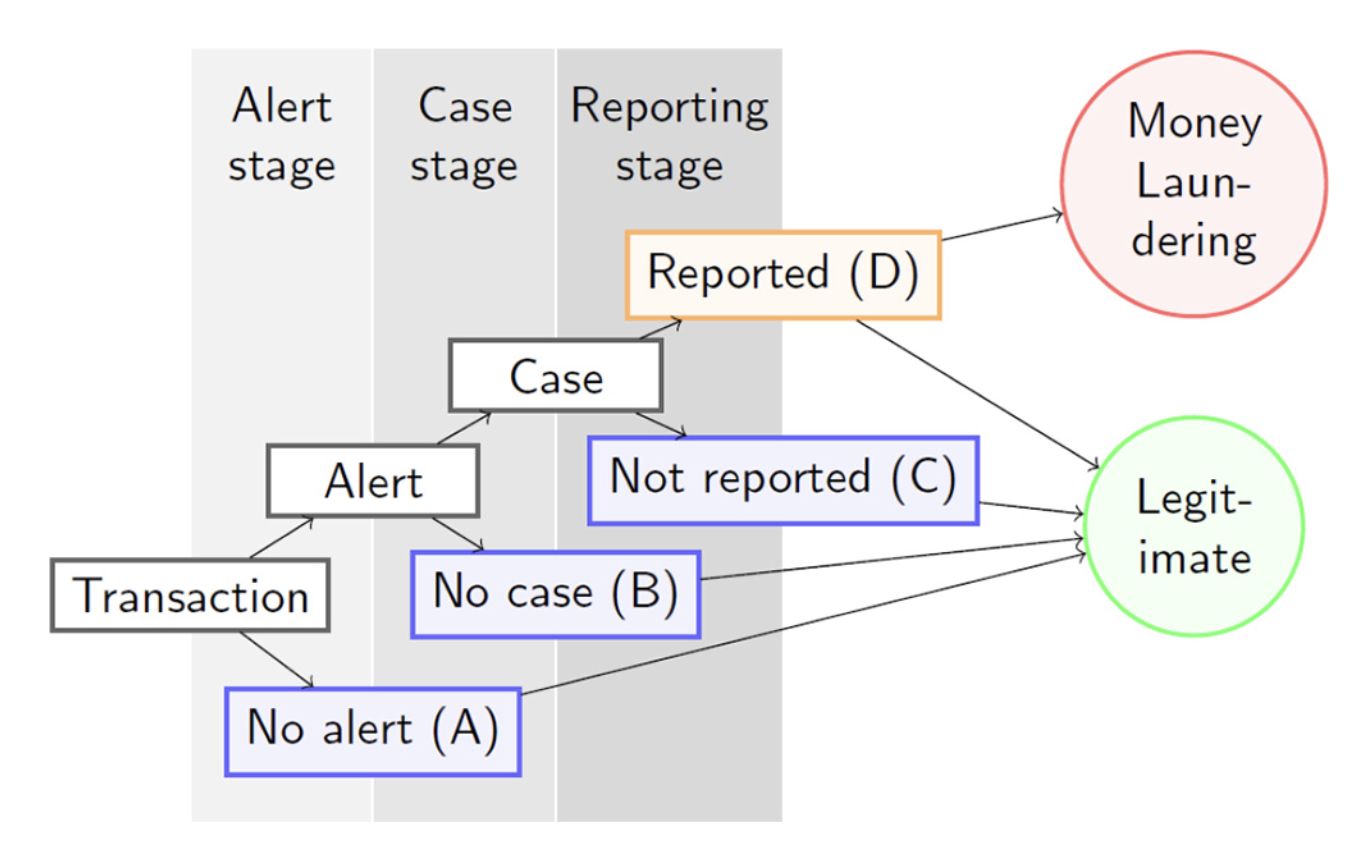

For data scientists within the Czech bank from which our sample dataset originated, they may very well also have access to such labels.

However, here we only have the *unlabeled* data, which limits us to unsupervised models to detect anomalies and outliers.

So for the remainder of this section, we'll explore illustrative examples on how to split data and deal with imbalanced datasets in the context of XGBoost specifically.

Then we'll get back to a different dataset where we do have labels, and explore more advanced approaches.

## Models

### Simple rules-based example

As noted in [Karim et al, 2023](https://arxiv.org/pdf/2302.11880.pdf)

> Transaction monitoring systems are predominantly rules-based thresholding protocols tuned for the volume and velocity of transactions with tiered escalation procedures. Thorough analysis is carried out using [manual] sophisticated techniques to determine whether or not a SAR need to be filed and the account in question suspended.

The Czech Republic [requires additional controls](https://www.cnb.cz/en/supervision-financial-market/legislation/money-laundering/) for certain types of transactions, and specifically requires additional KYC protocols to take place [for transactions over EUR1000](https://www.crowe.com/cz/news/anti-money-laundering-act), which translates to approximately CZK25,641.

We can easily implement such checks in code as follows:

In [15]:
str_count = transaction[(transaction['amount'] >= 25_641)].shape[0]
'%s (%.2f%%) of %s transactions were flagged as above the limit' % (str_count, 100 * str_count/transaction.shape[0], transaction.shape[0])

'52938 (5.01%) of 1056320 transactions were flagged as above the limit'

### A primer for ML-based models

There are several very well-documented approaches to supervised learning for AML. This include:

  * Evidence that Support Vector Machines (SVMs) and Random Forest (RF) can be used to classify fraud transactions, using large, annotated bank datasets ([Tang & Yin 2005](https://storage.googleapis.com/suptech-lab-practical-data-science-public/tang%20and%20yin%202005.pdf))
  * Positive results that Support Vector Machine (SVM), Logistic Regression (LR), and Multi-Layer Perceptron (MLP) models can be successfully trained on 1,047 data points, and that putting models in series can augment results ([Feng et all 2019](https://storage.googleapis.com/suptech-lab-practical-data-science-public/feng%20et%20al%202019.pdf))

Because the [paper we referenced](https://www.emerald.com/insight/content/doi/10.1108/JMLC-07-2019-0055/full/pdf) during the feature engineering above uses 1,716 engineered variables to train a machine learning model called XGBoost, we'll illustrate that model here.

#### Splitting train/test data and accounting for imbalance

The target column for supervised learning for AML is typically whether the transaction is part of a laundering operation (e.g., `is_laundering`=`True`)

However, we typically see that the vast majority (99.9%+) of transactions are not money laundering, a problem referred to as "class imbalance."  From [this article](https://mlimenrui.github.io/Imbalanced-data/):

> Imbalanced data typically refers to a model with classification problems where the classes are not represented equally(e.g. 90% of the data belongs to one class). They are commonly seen in fraud detection, cancer detection, manufacturing defects, and online ads conversion analytics.

> Working on an imbalanced dataset tends to be extremely tricky as simple classification algorithms tend to struggle in such situations, usually resulting in overfitting on the majority class and completely ignoring the minority class. This post details a guide on how to conduct data analysis and machine learning using an imbalanced dataset to predict a classification outcome.

In other words this can cause issues wherein a model can simply classify everything as non-money laundering, and achieve 99.9% accuracy.

So, when training a model, we would want to handle class imbalances. We can manage this. For example, [Microsoft documented](https://learn.microsoft.com/en-us/azure/machine-learning/concept-manage-ml-pitfalls#handle-imbalanced-data) some typical recommendations:

* *Data stage.* Resampling to even the class imbalance, either by up-sampling the smaller classes or down-sampling the larger classes. These methods require expertise to process and analyze.

* *Evaluation stage.* Review performance metrics for imbalanced data. For example, the F1 score is the harmonic mean of precision and recall. Precision measures a classifier's exactness, where higher precision indicates fewer false positives, while recall measures a classifier's completeness, where higher recall indicates fewer false negatives.

Most packages have a parameter for handling this (e.g., see the packages [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) or [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), both of which have a parameter called `class_weight` that can be [used for this](https://stackoverflow.com/a/30982811). Additionally, [Imbalanced Learn](https://imbalanced-learn.org/stable/user_guide.html) is a scikit-learn compatible package that can help handle this.

Perhaps the simplest option, however, is the model-agnostic [class_weight](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) utility provided by sklearn, which we explore below.

In [16]:
# # WARNING: THE CODE BELOW IS ILLUSTRATIVE AND WILL NOT RUN

# # Note: `df_example` assumes you have a feature-engineered dataset with the objective ('is_laundering') column included

# # Split the dataset 70/30
# seed = 7
# test_size = 0.30
# X = df_example.drop(columns=['is_laundering'])
# y = df_example['is_laundering']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# # Account for imbalance
# from sklearn.utils.class_weight import compute_sample_weight
# sample_weights = compute_sample_weight(
#     class_weight='balanced',
#     y=y_train
# )


#### Supervised learning scaffolding

In [17]:
# # WARNING: THE CODE BELOW IS ILLUSTRATIVE AND WILL NOT RUN

# # Train the model
# !pip install xgboost
# from xgboost import XGBClassifier
# xgb_classifier = XGBClassifier()
# xgb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# # Continue to do evaluation using confusion matrix, F1/precision/recall, etc

So in just a couple of lines we can train a classifier. (for those of you who have worked through our [M2.1 notebook](https://github.com/suptechlab/Data-Gymnasium/blob/main/notebooks/M2_1_Complaints_handling_and_triage_using_supervised_learning.ipynb) on consumer complaints classification, this process may look familiar)

However, as [Wei et al, 2023](https://storage.googleapis.com/suptech-lab-practical-data-science-public/wei-et-al-2023.pdf) noted, these classic supervised machine learning models (e.g., logistic regression, XGBoost, support vector machine, multilayer perceptron (MLP)) do have drawbacks:

> A limitation of these models is that [while they have been used in AML to reduce the human burden] they still heavily rely on the manual computation of certain features, which demands expert knowledge. For example, to obtain the characteristics of the trading counterparties, one needs to compute the number of different individuals one has transactions with. Such important features do not exist in original data, and it is difficult to calculate an appropriate one especially when considering high-order counterparties.

So we'll move toward exploring some options where such features do not need to be individually engineered in order to work.

#  Network analysis with IBM's AMLSim synthetic dataset

Because the datasets required for AML models are transactional and account-based, historically they necessarily rely on access to sensitive information.*
As established above, public real-world data is virtually non-existent.

Thankfully, there has been extensive research conducted to build simulation tools that can generate rich, voluminous synthetic datasets.

One such example is the [IBM AMLSim example dataset](https://www.kaggle.com/datasets/anshankul/ibm-amlsim-example-dataset) published on Kaggle.

Another is the [IBM Research synthetic transactions for AML set](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data).

Both of these synthetic sets were generated using the open source [AMLSim](https://github.com/IBM/AMLSim) tool. Notably, this tool is designed to simulate many types of transactional datasets (e.g., for [mobile money use cases](https://www.kaggle.com/datasets/ealaxi/paysim1)).

In this section, we'll be using the former to walk through an analysis inspired by [this article](https://medium.com/@jasonclwu/network-analysis-for-anti-money-laundering-with-python-ad981792a947) on network analysis for AML

---

\* In fact, some federated machine learning models with integrated privacy-enhancing technologies (PETs) are currently being researched, and are linked at the end of this notebook

## Load the data

In [18]:
c = connect_to_database()
q = f"""
  SELECT *
  FROM datagymnasium."amlsim_transactions";
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
df_amlsim_txn = pd.DataFrame(c.fetchall(), columns=cols)
q = f"""
  SELECT *
  FROM datagymnasium."amlsim_accounts";
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
df_amlsim_acc = pd.DataFrame(c.fetchall(), columns=cols)
q = f"""
  SELECT *
  FROM datagymnasium."amlsim_alerts";
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
df_amlsim_alt = pd.DataFrame(c.fetchall(), columns=cols)

df_amlsim_txn.shape

(1323234, 8)

In [19]:
df_amlsim_txn.columns

Index(['TX_ID', 'SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID', 'TX_TYPE',
       'TX_AMOUNT', 'TIMESTAMP', 'IS_FRAUD', 'ALERT_ID'],
      dtype='object')

## Preprocessing the data

### Prepare consolidated graph for account-based network analysis

In [20]:
df_amlsim_txn['TX_ID'] = df_amlsim_txn['TX_ID'].astype(str)
df_amlsim_txn['SENDER_ACCOUNT_ID'] = df_amlsim_txn['SENDER_ACCOUNT_ID'].astype(str)
df_amlsim_txn['RECEIVER_ACCOUNT_ID'] = df_amlsim_txn['RECEIVER_ACCOUNT_ID'].astype(str)
df_amlsim_txn['TX_AMOUNT'] = df_amlsim_txn['TX_AMOUNT'].astype(float)

sample_size = 2500
amlsim_edges = df_amlsim_txn.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':['count','sum']}).sample(sample_size, random_state=1337)
amlsim_edges.columns = ['source','target','agg_edge_large_count','agg_edge_large_amt']
amlsim_edges['value'] = amlsim_edges['agg_edge_large_amt']
amlsim_edges['title'] = amlsim_edges.apply(lambda df: f'from: {df.source}\nto: {df.target}\nagg_count: {df.agg_edge_large_count:,.0f}\nagg_amount: {df.agg_edge_large_amt:,.0f}', axis=1)

amlsim_edges

source target  agg_edge_large_count  agg_edge_large_amt        value  \
24582   5671   9986                    20             3358.20      3358.20   
41189   7776   4743                    20             3562.60      3562.60   
59191   9355    624                     1         21474836.47  21474836.47   
17805   4490   3613                   180            99230.40     99230.40   
11593    334   4974                     5         24320261.10  24320261.10   
...      ...    ...                   ...                 ...          ...   
12701   3640   8595                    20             2043.60      2043.60   
45514   8251   7536                     1         11193187.00  11193187.00   
6423    2338   9892                     2            52555.82     52555.82   
21755   5195   2298                    20              232.80       232.80   
34478   7091   1978                    19              179.74       179.74   

                                                   title  
24582  from: 5671\nto: 9986\nagg_count: 20\nagg_amoun...  
41189  from: 7776\nto: 4743\nagg_count: 20\nagg_amoun...  
59191  from: 9355\nto: 624\nagg_count: 1\nagg_amount:...  
17805  from: 4490\nto: 3613\nagg_count: 180\nagg_amou...  
11593  from: 334\nto: 4974\nagg_count: 5\nagg_amount:...  
...                                                  ...  
12701  from: 3640\nto: 8595\nagg_count: 20\nagg_amoun...  
45514  from: 8251\nto: 7536\nagg_count: 1\nagg_amount...  
6423   from: 2338\nto: 9892\nagg_count: 2\nagg_amount...  
21755  from: 5195\nto: 2298\nagg_count: 20\nagg_amoun...  
34478  from: 7091\nto: 1978\nagg_count: 19\nagg_amoun...  

[2500 rows x 6 columns]

### Other sampling methods

In the example above, we simply randomly sampled 2500 transactions. While this may suffice for the illustrative puruposes of this notebook, in practice it will be important to be more mindful of the implications of sampling, and to explore other options.

As an example, in the code below, we replace random sampling with different range of timeframes (e.g. week, month, quarter, year etc.) for real-life cases. This code isn't used for the resulting analysis, but is presented as a practical example to draw inspiration from.

In [21]:
edge_full = df_amlsim_txn.groupby(['SENDER_ACCOUNT_ID', 'RECEIVER_ACCOUNT_ID'],as_index=False).agg({'TX_AMOUNT':'count'}).drop(columns=['TX_AMOUNT']).rename(columns={'SENDER_ACCOUNT_ID':'source','RECEIVER_ACCOUNT_ID':'target'})

max_dict = {}
for i in range(1000, len(edge_full)+1, 500):
    G = nx.from_pandas_edgelist(edge_full.sample(i, random_state=721), source='source', target='target')
    max_dict[i] = max(sorted([len(x) for x in list(nx.connected_components(G))]))

max_group_size_per_sample = pd.DataFrame({'sample_size':max_dict.keys(), 'max_group_size':max_dict.values()})
max_group_size_per_sample

sample_size  max_group_size
0           1000              11
1           1500              28
2           2000              64
3           2500             121
4           3000             406
..           ...             ...
131        66500            9995
132        67000            9997
133        67500            9998
134        68000            9999
135        68500            9999

[136 rows x 2 columns]

## Models

### Simple rule-based example

Here we might continue our threshold-based rules system for transaction monitoring. In the case of [US regulation on currency transaction reports (CTRs)](https://www.ecfr.gov/current/title-31/subtitle-B/chapter-X/part-1010), financial institutions are required to report a transaction when the value is greater than US$10,000.

Here we show a couple of examples of (a) how simple this can be to pull out of even massive sets of data, and (b) how coarse this technique is, which in turn necessitates residual manual effort in filtering the large quantity of transactions that trigger such filters.

In [22]:
str_count = df_amlsim_txn[df_amlsim_txn['TX_AMOUNT']>10_000].shape[0]
'%s (%.2f%%) of %s simulated transactions were flagged as above the limit' % (str_count, 100 * str_count/df_amlsim_txn.shape[0], df_amlsim_txn.shape[0])

'34165 (2.58%) of 1323234 simulated transactions were flagged as above the limit'

In [23]:
aml_counts = df_amlsim_alt[df_amlsim_alt['IS_FRAUD']].shape[0]
'Of those %s flagged transactions, %s (%.2f%%) were not laundering and %s (%.2f%%) were' % (str_count, str_count-aml_counts, 100.0*(str_count-aml_counts)/str_count, aml_counts, 100.0*aml_counts/str_count)

'Of those 34165 flagged transactions, 32446 (94.97%) were not laundering and 1719 (5.03%) were'

### Network analysis

The McKinsey report we referenced in our money laundering 101 section also notes the power of network analysis for AML:

> [P]owerful tools can vastly improve the effectiveness and efficiency of AML and KYC programs. Network analytics is one such tool. This can significantly improve the effectiveness of detection methods, by finding the hidden links between entities, illuminating the relationships and interconnected transactions that characterize money-laundering activity. Transgressions can thereby be detected that would have been missed by traditional models.

It notes 3 steps

1.  Build the Smith network
  * Begin with Mrs. Smith and identify all other entities, including accounts and people, that she is connected to.

2. Create connections
  * Next, add the relationships between the individuals, their respective accounts, and any related activity showing payments made within the system to show the flow of funds.

3. Infer relationships using non-traditional data sources
  * Use enriched data about individuals and their related accounts in order to uncover inferred connections that show suspicious or anomalous activity that might suggest money laundering


Inspiration:
* Financial Crime and Fraud Detection using Graph Computing https://arxiv.org/pdf/2103.01854.pdf
* Blog: https://medium.com/@jasonclwu/network-analysis-for-anti-money-laundering-with-python-ad981792a947#d4ac
* Actor-level: https://github.com/jasonclwu/202209_AML_Network_Analysis/blob/main/AML_Network_Analysis.ipynb
  * Cycle detection? https://stackoverflow.com/a/35684668
* AGQL version:
https://colab.research.google.com/github/joerg84/Graph_Powered_ML_Workshop/blob/master/Fraud_Detection.ipynb#scrollTo=tnkBd6wktiTF


#### Prepare the network

In [24]:
H = nx.from_pandas_edgelist(amlsim_edges, source='source', target='target', edge_attr=['title','value'])

In [25]:
list(H.edges(data=True))[0:2]

[('5671',
  '9986',
  {'title': 'from: 5671\nto: 9986\nagg_count: 20\nagg_amount: 3,358',
   'value': 3358.2}),
 ('9986',
  '8176',
  {'title': 'from: 8176\nto: 9986\nagg_count: 17\nagg_amount: 209',
   'value': 209.44})]

In [26]:
nt = net.Network(notebook=True, cdn_resources="in_line", width='100%', height='400px', directed=False)
nt.toggle_physics(False)
nt.from_nx(H)
nt.show('H_full.html')
display(HTML('H_full.html'))

H_full.html


Patterns from https://arxiv.org/abs/2306.11586

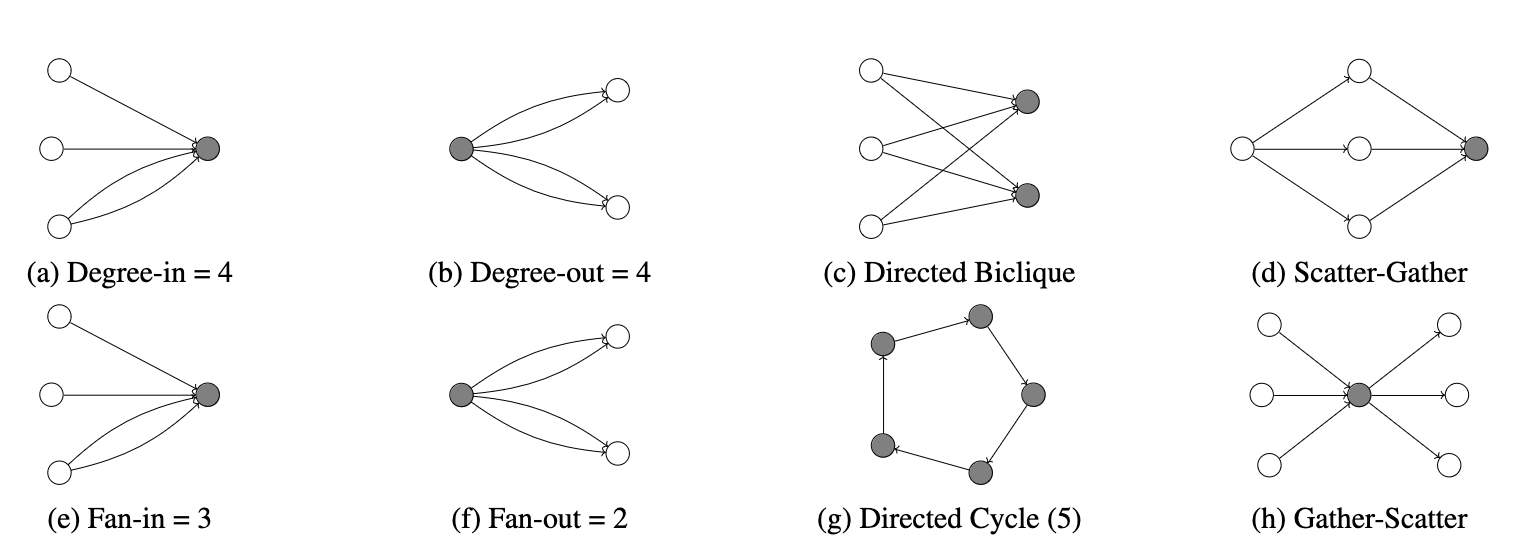

#### Identify substructures

In [27]:
len(list(nx.connected_components(H)))

1073

In [28]:
pd.DataFrame(list(nx.connected_components(H))[0:5])

0     1     2     3     4     5     6     7     8     9   ...    72  \
0  8181  9851  7629  9014  9726  8176  2483  7382  7491  9732  ...  None   
1  7776  4743  None  None  None  None  None  None  None  None  ...  None   
2   101  9370  9592  4377  9603  9721  3334  4604  9955  1322  ...  4923   
3  3613  4490  None  None  None  None  None  None  None  None  ...  None   
4   334  4974  None  None  None  None  None  None  None  None  ...  None   

     73    74    75    76    77    78    79    80    81  
0  None  None  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  None  None  
2  9315   624  9221  9931  9881  8096  9654  6114  8699  
3  None  None  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  None  None  

[5 rows x 82 columns]

In [29]:
group_dict_H = {}

for group, nodes in enumerate(sorted(list(nx.connected_components(H)), key=len, reverse=True), start=1):
    for node in nodes:
        group_dict_H[node] = group

groups = pd.DataFrame({'source':group_dict_H.keys(), 'group':group_dict_H.values()}).sort_values(by=['group','source'])
groups

source  group
17     1199      1
16     1281      1
9      1441      1
12     1608      1
72     1713      1
...     ...    ...
3565   9139   1071
3567   7536   1072
3568   8251   1072
3570   2298   1073
3569   5195   1073

[3571 rows x 2 columns]

In [30]:
group_summary = groups.groupby('group', as_index=False).agg({'source':'count'}).rename(columns={'source':'num_of_nodes'})
group_summary

group  num_of_nodes
0         1            83
1         2            82
2         3            65
3         4            62
4         5            53
...     ...           ...
1068   1069             2
1069   1070             2
1070   1071             2
1071   1072             2
1072   1073             2

[1073 rows x 2 columns]

In [31]:
nx.set_node_attributes(H, group_dict_H, 'group')

degree_dict_H = dict(H.degree)
nx.set_node_attributes(H, degree_dict_H, 'value')

neighbor_dict_H = {}
for node in H.nodes(data=False):
    neighbor_dict_H[node] = ','.join([str(n) for n in H.neighbors(node)])

title_dict_H = {}
for node in H.nodes:
     title_dict_H[node] = f'id: {node}\ngroup: {group_dict_H[node]}\ndegree: {degree_dict_H[node]}\nneighbor: {neighbor_dict_H[node]}'

nx.set_node_attributes(H, title_dict_H, 'title')

In [32]:
target_group_size_threshold=10
group_summary[group_summary['num_of_nodes']>=target_group_size_threshold]

group  num_of_nodes
0       1            83
1       2            82
2       3            65
3       4            62
4       5            53
5       6            38
6       7            19
7       8            18
8       9            18
9      10            17
10     11            16
11     12            15
12     13            14
13     14            14
14     15            14
15     16            12
16     17            12
17     18            12
18     19            11
19     20            11
20     21            11
21     22            11
22     23            11
23     24            10
24     25            10
25     26            10
26     27            10
27     28            10

In [33]:
target_groups = list(group_summary[group_summary['num_of_nodes']>=target_group_size_threshold]['group'])
target_nodes = [node for node, group in group_dict_H.items() if group in target_groups]

H_sub = H.subgraph(target_nodes)
nt = net.Network(notebook=True, cdn_resources="in_line", width='50%', height='400px', directed=True)
nt.from_nx(H_sub)
nt.save_graph('H_sub.html')


To view and interact with the above diagram open the "H_sub.html" file and click "Trust HTML". You may have to wait for it to load.

In [34]:
nt = net.Network(notebook=True, cdn_resources="in_line", width='50%', height='400px', directed=True)
nt.from_nx(H_sub)

pos = nx.kamada_kawai_layout(H_sub, scale=1000)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

nt.save_graph('H_sub_communities_kamada_kawai.html')


To view and interact with the above diagram open the "H_sub_communities_kamada_kawai.html" file and click "Trust HTML". You may have to wait for it to load.

In [35]:
nt = net.Network(notebook=True, cdn_resources="in_line", width='50%', height='400px', directed=True)
nt.from_nx(H_sub)

pos = nx.spring_layout(H_sub, scale=1000)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

nt.save_graph('H_sub_communities_spring.html')


To view and interact with the above diagram open the "H_sub_communities_kamada_kawai.html" file and click "Trust HTML". You may have to wait for it to load.

In [36]:
# from google.colab import files as FILE
import requests
import os
import base64

img_data = requests.get('https://openmoji.org/data/color/svg/1F608.svg').content
with open('badguy.svg', 'wb') as handler:
    handler.write(img_data)


In [37]:
target_node = '9982'
target_groups = [dict(H.nodes(data=True))[target_node]['group']]
target_nodes = [node for node, group in group_dict_H.items() if group in target_groups]

H_sub = H.subgraph(target_nodes)

nt = net.Network(notebook=True, cdn_resources="in_line", width='50%', height='400px', directed=True)
nt.from_nx(H_sub)

pos = nx.spring_layout(H_sub, scale=1000, seed=721, k=0.01)
for node in nt.nodes:
    node['x'] = pos[node['id']][0]
    node['y'] = pos[node['id']][1]

# Images don't work in Colab
[node for node in nt.nodes if node['id']==target_node][0]['shape'] = 'circularImage'
[node for node in nt.nodes if node['id']==target_node][0]['image'] = 'https://openmoji.org/data/color/svg/1F608.svg'
[node for node in nt.nodes if node['id']==target_node][0]['color'] = '#ff4f4f'

nt.show('H_sub_end2end_node.html')
display(HTML('H_sub_end2end_node.html'))

H_sub_end2end_node.html


In [38]:
H_sub_nodes = pd.DataFrame(nt.nodes)[['id','group','value','title']].rename(columns={'id':'source','value':'degree','title':'neighbor'}).sort_values(by='source')
H_sub_nodes['neighbor'] = H_sub_nodes['neighbor'].apply(lambda x:x.split('neighbor: ')[-1])
H_sub_nodes.head()

source  group  degree neighbor
60    139      3       1     9982
40   1515      3       1     9601
45   1844      3       1     9189
22   2051      3       1     7256
13   2160      3       1     9091

In [39]:
H_sub_edges = amlsim_edges[(amlsim_edges['source'].isin(target_nodes)) | (amlsim_edges['target'].isin(target_nodes))].drop(columns=['value','title']).sort_values(by=['source','target'])
H_sub_edges.head()

source target  agg_edge_large_count  agg_edge_large_amt
2254     139   9982                    21              826.14
3962    1844   9189                    21             7662.69
4539    2051   7256                    19              469.30
6719    2378   3611                     4         25123037.62
10234   3159   9993                    21              388.71

# GNNs with IBM's synthetic IT-AML dataset

Graph Neural Networks (GNNs) are a relatively new technology on the AML scene, and combine the benefits of feature engineering and network analysis we've explored above.

They allow for automated feature engineering (i.e. generation of node-based embeddings) while leveraging neural network technologies to act efficiently on even massive transactional datasets.

Here we'll walk through setting up of IBM's [synthetic IT-AML dataset](https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml), which is an iteration on the AMLSim dataset above that is often benchmarked against the recent literature.

In [40]:
c = connect_to_database()
q = """
  SELECT *
  FROM datagymnasium."li_small_trans"
"""
c.execute(q)
cols = [desc[0] for desc in c.description]
df = pd.DataFrame(c.fetchall(), columns=cols)
df = df.sort_values(by=["Timestamp"], ascending=True, ignore_index=True)

df = df.astype({
    'Amount Received': 'float',
    'Amount Paid': 'float'
})

df.shape

(6924049, 11)

## Checking and cleaning the data

In [41]:
df.sample(5)

Timestamp From Bank    Account To Bank  Account.1  \
506360   2022/09/01 01:46    262622  81982EC80  262622  81982EC80   
575976   2022/09/01 03:17    330456  814593850  330456  814593850   
4870417  2022/09/07 15:42      2860  8007D48A0      11  8009A3340   
2634068  2022/09/03 05:38      1231  8004C2FA0     531  800B0F090   
563454   2022/09/01 03:00     69314  819DE9141   70997  81BBD44F1   

         Amount Received Receiving Currency  Amount Paid Payment Currency  \
506360         15.010000          US Dollar    15.010000        US Dollar   
575976       1110.540000               Euro  1110.540000             Euro   
4870417        27.200000          US Dollar    27.200000        US Dollar   
2634068       347.980000          US Dollar   347.980000        US Dollar   
563454          2.655304            Bitcoin     2.655304          Bitcoin   

        Payment Format Is Laundering  
506360    Reinvestment             0  
575976    Reinvestment             0  
4870417           Wire             0  
2634068         Cheque             0  
563454         Bitcoin             0

In [42]:
set(df['Receiving Currency']).union(set(df['Payment Currency']))

{'Australian Dollar',
 'Bitcoin',
 'Brazil Real',
 'Canadian Dollar',
 'Euro',
 'Mexican Peso',
 'Ruble',
 'Rupee',
 'Saudi Riyal',
 'Shekel',
 'Swiss Franc',
 'UK Pound',
 'US Dollar',
 'Yen',
 'Yuan'}

In [43]:
set(df['Payment Format'])

{'ACH', 'Bitcoin', 'Cash', 'Cheque', 'Credit Card', 'Reinvestment', 'Wire'}

In [44]:
df['Is Laundering'].value_counts()

0    6920484
1       3565
Name: Is Laundering, dtype: int64

## Preprocessing the data

Here we take care of two main steps:
* Preparing a dataframe wih uniform currency for the rule-based example
* Preparing a network graph for network analysis



### Add column so all transactions are in USD

In [45]:
# This cell takes ~2.5min

# From: https://www.xe.com/currencytables/?from=USD&date=2022-09-01#table-section
# With the exception of Bitcoin, which looks like it was hardcoded into the simulator at 12,000 USD
fx_to_usd = {
    'Australian Dollar':0.6774789665513997,
    'Bitcoin':12000,
    'Brazil Real':0.1911673449048849,
    'Canadian Dollar':0.7596423300464944,
    'Euro':0.9946339557196314,
    'Mexican Peso':0.04941776418962724,
    'Ruble':0.016613042876341275,
    'Rupee':0.012553145819530159,
    'Saudi Riyal':0.26666666666666666,
    'Shekel':0.2944788409551308,
    'Swiss Franc':1.0163936375818772,
    'UK Pound':1.1534595264849723,
    'US Dollar':1,
    'Yen':0.007145678064830199,
    'Yuan':0.14478650071897736
}
df['Amount Paid USD'] = df.apply(lambda row: row['Amount Paid'] * fx_to_usd[row['Payment Currency']], axis = 1) # takes ~75sec
df['Amount Received USD'] = df.apply(lambda row: row['Amount Received'] * fx_to_usd[row['Receiving Currency']], axis = 1) # takes ~75sec

In [46]:
df.sample(n=5)

Timestamp From Bank    Account To Bank  Account.1  \
2530320  2022/09/02 23:27     21414  800AB0970    1812  8046B36B0   
4387634  2022/09/06 22:17     27356  802BBE5B0    5923  80AAB80D0   
1923004  2022/09/02 09:01     12469  804EC9340   11587  804FD2170   
828974   2022/09/01 08:49    112926  814E3FA60  112926  814E3FA60   
4219912  2022/09/06 16:00    245681  810F8B960  246242  811204CD0   

         Amount Received Receiving Currency  Amount Paid Payment Currency  \
2530320          1004.68          US Dollar      1004.68        US Dollar   
4387634         10521.22               Yuan     10521.22             Yuan   
1923004           515.57               Yuan       515.57             Yuan   
828974            144.42               Yuan       144.42             Yuan   
4219912         94109.33       Mexican Peso     94109.33     Mexican Peso   

        Payment Format Is Laundering  Amount Paid USD  Amount Received USD  
2530320           Cash             0      1004.680000          1004.680000  
4387634    Credit Card             0      1523.330627          1523.330627  
1923004         Cheque             0        74.647576            74.647576  
828974    Reinvestment             0        20.910066            20.910066  
4219912         Cheque             0      4650.672678          4650.672678

In [47]:
# Explore a summary of these transactions
# Inspired by: https://medium.com/analytics-vidhya/transaction-fraud-detection-%EF%B8%8F-%EF%B8%8F-automating-money-laundering-alerts-8d7d265befa9

#Pivot table
amlsim_pivot1=pd.pivot_table(df,index=["Payment Format"],
                               values=['Amount Paid USD','Is Laundering'],
                               aggfunc=[np.sum,np.std], margins=True)

#Adding color gradient
cm = sns.light_palette("green", as_cmap=True)
amlsim_pivot1.style.background_gradient(cmap=cm)

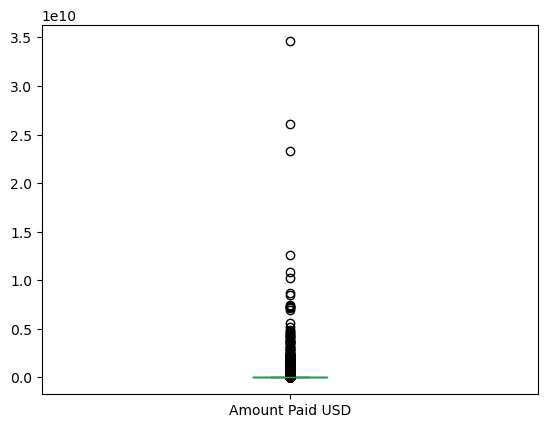

In [48]:
df["Amount Paid USD"].plot(kind='box')
plt.show()

In [49]:
df[df["Amount Paid USD"] == max(df["Amount Paid USD"])]

Timestamp From Bank    Account To Bank  Account.1  \
2515598  2022/09/02 23:06     11047  8018B08B0   11047  8018B08B0   

         Amount Received Receiving Currency   Amount Paid Payment Currency  \
2515598     3.644854e+12                Yen  3.458115e+10        US Dollar   

        Payment Format Is Laundering  Amount Paid USD  Amount Received USD  
2515598            ACH             0     3.458115e+10         2.604495e+10

### Prepare consolidated graph for account-based network analysis

In [50]:
# Create a new dataframe with two columns
df1 = df[['Account', 'Account.1', 'Amount Received USD']].copy()
df1.columns = ['sender', 'receiver', 'amount']
df1.sample(n=6)

sender   receiver       amount
3418     819B60830  819B60830  1160.320000
2156401  80867F980  8086C55F0    53.907710
5634796  8121BD5D0  818B33140  1762.053731
1329     805D09AF0  8060CFE60  1476.130000
1871099  803AD7620  81463E0C0  1792.322227
3247097  8089B2670  80F5E0EC0   820.450000

In [51]:
edges1 = df1.groupby(['sender', 'receiver'],as_index=False).agg({'amount':['count','sum']})
edges1.columns = ['sender', 'receiver', 'count', 'sum']
edges1.head()

sender   receiver  count        sum
0  10042B660  800054200      1  700620.29
1  10042B660  800056ED0      2    6286.10
2  10042B660  8000588E0     20   14949.20
3  10042B660  80005CA70     20   12092.80
4  10042B660  80005F3A0      2  147325.66

In [52]:
G = nx.from_pandas_edgelist(edges1, source='sender', target='receiver', edge_attr=['count','sum'])
list(G.nodes)[0:5]

['10042B660', '800054200', '800056ED0', '8000588E0', '80005CA70']

In [53]:
list(G.edges(data=True))[0:5]

[('10042B660', '800054200', {'count': 1, 'sum': 700620.29}),
 ('10042B660', '800056ED0', {'count': 2, 'sum': 6286.1}),
 ('10042B660', '8000588E0', {'count': 20, 'sum': 14949.2}),
 ('10042B660', '80005CA70', {'count': 20, 'sum': 12092.8}),
 ('10042B660', '80005F3A0', {'count': 2, 'sum': 147325.66})]

### Temporal splitting for train/validation/test data
"We use a 60-20-20 temporal train-validation-test split, i.e., we split the transaction indices after
ordering them by their timestamps."

In [54]:
train_ratio = 0.6
test_ratio = 0.2
validation_ratio = 0.2

df_train = df.head(int(df.shape[0]*(train_ratio)))
df_nontrain = df.iloc[max(df_train.index):]
df_test = df_nontrain.head(int(df_nontrain.shape[0]*(test_ratio/(test_ratio+validation_ratio))))
df_validate = df_nontrain.tail(int(df_nontrain.shape[0]*(test_ratio/(test_ratio+validation_ratio))))
del df_nontrain

print("Train:\n%s to %s\n\nTest:\n%s to %s\n\nValidate:\n%s to %s" % (df_train['Timestamp'].min(), df_train['Timestamp'].max(), df_test['Timestamp'].min(), df_test['Timestamp'].max(), df_validate['Timestamp'].min(), df_validate['Timestamp'].max()))

Train:
2022/09/01 00:00 to 2022/09/06 13:32

Test:
2022/09/06 13:32 to 2022/09/08 16:06

Validate:
2022/09/08 16:06 to 2022/09/17 15:28


## Feature engineering

### Manual option
Crypto transactions (Network Structure, using Graph Convolutional Networks (GCNs)): https://arxiv.org/pdf/1908.02591.pdf

166 features per node
* 94 relataed to local information about the transaction
  * time step
  * number of inputs/outputs
  * transaction fee
  * output volume
  * aggregated figures (e.g., average BTC received (spent) by the inputs/outputs and average number of incoming (outgoing) transactions associated with the inputs/outputs)
* 72 features, called aggregated features, are obtained by aggregating transaction information one-hop backward/forward from the center node, giving the maximum, minimum, standard deviation and correlation coefficients of the neighbour transactions for the same information data (number of inputs/outputs, transaction fee, etc.)

### Automated option

See: [Wu et al, 2021](https://storage.googleapis.com/suptech-lab-practical-data-science-public/wu-et-al-2021.pdf)

## Models

### Graph neural networks (GNNs) for directed multigraphs

History of Graph Neural Networks (GNNs) for AML
* Oct 2017: What's a GAT? https://arxiv.org/abs/1710.10903v3
* Oct 2018: How powerful are GNNs? (introduction of Graph Isomorphism Network (GIN)) https://arxiv.org/abs/1810.00826v3
* Nov 2018: Scalable Graph Learning for Anti-Money Laundering: A First Look (graph convolutional networks (GCNs) on synthetic AMLSim data) https://arxiv.org/abs/1812.00076
  * Video: [AI for Finance: Graph Convolutional Networks for Anti-Money Laundering](https://www.youtube.com/watch?v=z3cyz2O7-cE)
  * Video: [Anti-Money Laundering in Bitcoin: Experiments with Graph Convolutional Networks](https://www.youtube.com/watch?v=HtJeXPr_PBY)
* Apr 2020: FlowScope: Spotting Money Laundering Based on Graphs https://shenghua-liu.github.io/papers/aaai2020cr-flowscope.pdf#
* Oct 2022: LaundroGraph: Self-Supervised Graph Representation Learning for Anti-Money Laundering (self-supervised learning to generate account/transaction features) https://arxiv.org/abs/2210.14360
* Feb 2023: Catch Me If You Can: Semi-supervised Graph Learning for Spotting Money Laundering https://arxiv.org/abs/2302.11880
* Jun 2023: Realistic Synthetic Financial Transactions for Anti-Money Laundering Models (improvement over AMLSim with IT-AML) https://arxiv.org/abs/2306.16424
* July 2023 A Dynamic Graph Convolutional Network for Anti-money Laundering [Wei et al 2023](https://storage.googleapis.com/suptech-lab-practical-data-science-public/wei-et-al-2023.pdf)
  * DynGAT model proposed in that paper balances precision and recall and claims to address the issues of classic GAT methods where "information from different time period is mixed up".
  * showed (Table 2) 98+% recall for IBM AMLSim-10k dataset (precursor to what we're using here), but that's because "it tends to classify everyone as illegal accounts" which makes it less useful than it seems
* Jun-Oct 2023 Provably Powerful Graph Neural Networks for Directed Multigraphs (showed that GNNs could have solid results on the exact dataset we're working on right now) https://arxiv.org/abs/2306.11586



GNN Course: https://github.com/mlabonne/Graph-Neural-Network-Course

GNN Tutorial: https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial7/GNN_overview.ipynb
* Video 1: https://www.youtube.com/watch?v=fK7d56Ly9q8
* Video 2: https://www.youtube.com/watch?v=ZCNSUWe4a_Q

# Further Reading

* "future AML systems should not be linear; they should be cyclical systems in which the automated methods communicate with and learn from the analysts" https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3625415


Graph Neural Nets (GNNs) and Graph Convolutional Nets (GCNs)
* Advanced Nvidia work on Graph Learning: https://developer.nvidia.com/blog/optimizing-fraud-detection-in-financial-services-with-graph-neural-networks-and-nvidia-gpus/
* Embeddings (Node2Vec - https://arxiv.org/abs/1607.00653) for deeper analysis: https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9363921
  * For those who saw embeddings in our tweet clustering algorithm, slide 96 here: https://docs.google.com/presentation/d/1lNS5O4BqGrds6BK-Od1qEA730ZLd3jiLqWI-McgeT58/edit#slide=id.g1e03f3ed5cd_0_10588

Resources on cutting edge work in this area on PETs for federated learning - "One of the most significant issues for financial institutions to overcome in implementing AML is the distribution, storage, and processing of their data" https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3625415:
* PETs for federated anomaly detection: https://github.com/idsla/Scarlet-PETs
  * Competition: https://www.drivendata.org/competitions/98/nist-federated-learning-1/page/524/